demo/testing notebook for plotting and analysis (maybe should break up into separate notebooks later)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from analysis import *
from plotting import *

examples of summarizing/previewing data before plotting/analysis

In [2]:
# For each protocol, for each (f, g) combo, you get access to these three things
[k for k in dejmps_data[0.45, 1]]

['matrices', 'successes', 'protocol']

In [4]:
# Can print all available data for each protocol or just data in a given range
# print_protocol_summary(dejmps_data)
# print_protocol_summary(dejmps_data, (0, 0.65), (0,1))
# print_protocol_summary(bbpssw_data, (0, 0.65), (0,1))
# print_protocol_summary(epl_data, (0, 0.65), (0,1))
# print_protocol_summary(epl_local_change_data, (0, 0.65), (0,1))
print_protocol_summary(epl_local_change_data, (0.8, 0.89), (0.9,1))

Summary for protocol: EPL with $X_B$ correction applied
--------------------------------------------------
Fidelity: 0.8000, Gate Fidelity: 0.9000 -> Simulations: 200
Fidelity: 0.8000, Gate Fidelity: 0.9900 -> Simulations: 200
Fidelity: 0.8000, Gate Fidelity: 0.9990 -> Simulations: 200
Fidelity: 0.8000, Gate Fidelity: 1.0000 -> Simulations: 200
Fidelity: 0.8500, Gate Fidelity: 0.9000 -> Simulations: 200
Fidelity: 0.8500, Gate Fidelity: 0.9900 -> Simulations: 200
Fidelity: 0.8500, Gate Fidelity: 0.9990 -> Simulations: 200
Fidelity: 0.8500, Gate Fidelity: 1.0000 -> Simulations: 200




example analysis output

In [4]:
dejmps_results = analyze_multiple_combos(dejmps_data, n_bootstrap=1000, seed=42)

for (f, g), stats in dejmps_results.items():
    print(f"F: {f:.3f}, G: {g:.3f} -> Avg Fidelity: {stats['avg_fidelity']:.4f} ± {stats['avg_fidelity_err']:.4f}, "
          f"Success Rate: {stats['success_probability']:.3f} ± {stats['success_probability_err']:.3f}")

F: 0.450, G: 1.000 -> Avg Fidelity: 0.4530 ± 0.0216, Success Rate: 0.582 ± 0.022
F: 0.460, G: 1.000 -> Avg Fidelity: 0.4720 ± 0.0220, Success Rate: 0.622 ± 0.022
F: 0.470, G: 1.000 -> Avg Fidelity: 0.5212 ± 0.0200, Success Rate: 0.654 ± 0.021
F: 0.480, G: 1.000 -> Avg Fidelity: 0.4730 ± 0.0214, Success Rate: 0.608 ± 0.022
F: 0.490, G: 1.000 -> Avg Fidelity: 0.5150 ± 0.0225, Success Rate: 0.624 ± 0.022
F: 0.500, G: 1.000 -> Avg Fidelity: 0.5130 ± 0.0225, Success Rate: 0.604 ± 0.022
F: 0.510, G: 1.000 -> Avg Fidelity: 0.5220 ± 0.0219, Success Rate: 0.640 ± 0.021
F: 0.520, G: 1.000 -> Avg Fidelity: 0.5270 ± 0.0222, Success Rate: 0.624 ± 0.022
F: 0.530, G: 1.000 -> Avg Fidelity: 0.5070 ± 0.0215, Success Rate: 0.672 ± 0.021
F: 0.540, G: 1.000 -> Avg Fidelity: 0.5470 ± 0.0221, Success Rate: 0.670 ± 0.021
F: 0.550, G: 1.000 -> Avg Fidelity: 0.5170 ± 0.0221, Success Rate: 0.650 ± 0.021
F: 0.800, G: 0.900 -> Avg Fidelity: 0.5720 ± 0.0216, Success Rate: 0.664 ± 0.021
F: 0.800, G: 0.990 -> Avg Fi

# 1D plots
still want to clean up plotting code (see todo comments in plotting.py), but basic functionality is ready


NOTE: deleted plot_1d_analysis, leaving this notebook here just for reference

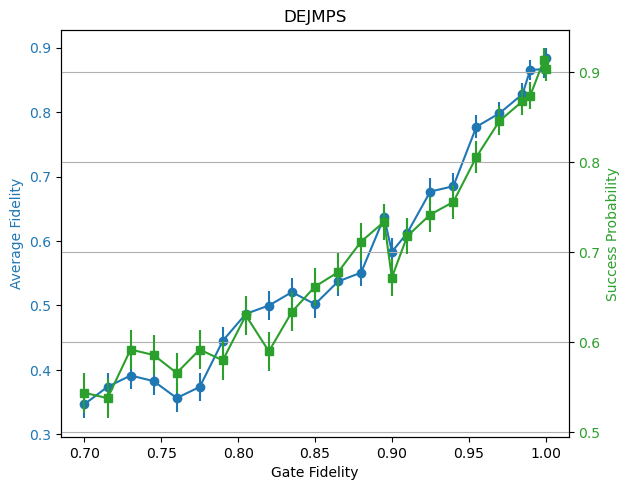

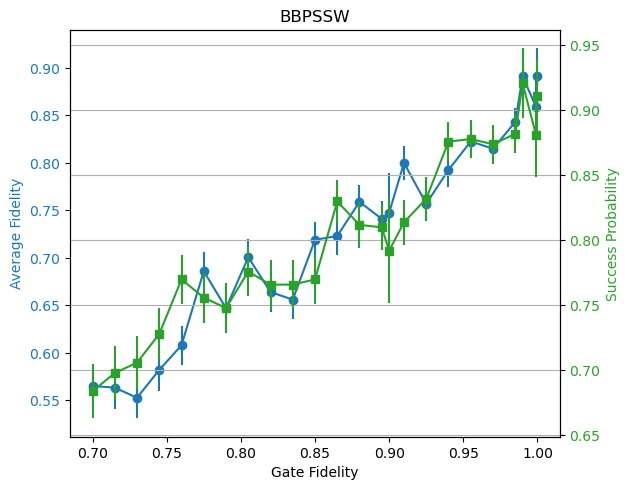

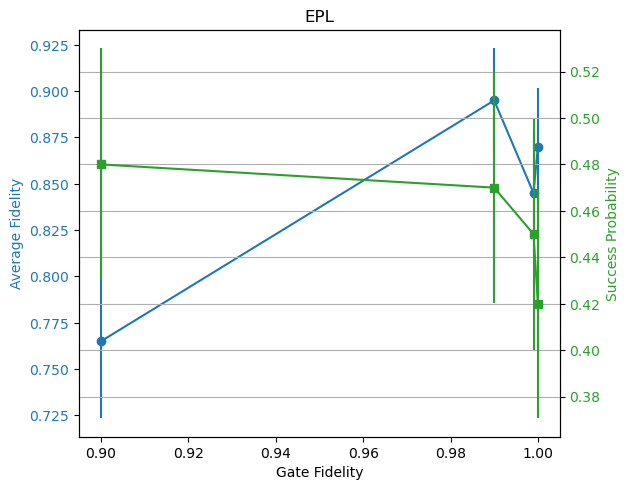

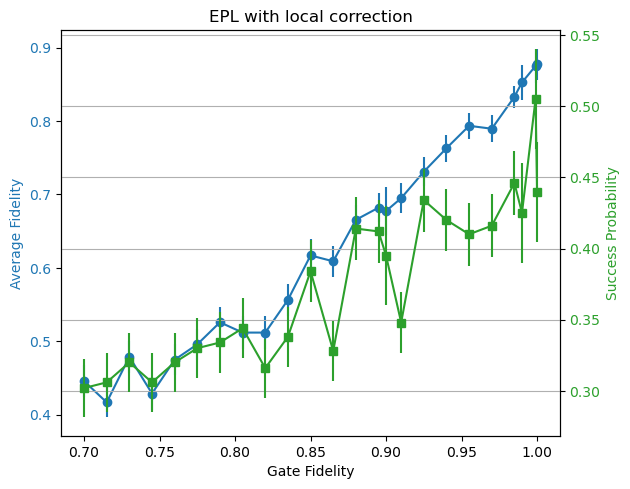

In [5]:
# fix f at 0.9, vary g
fr = (0.9, 0.9)
dejmps_results_f9 = analyze_multiple_combos(dejmps_data, fidelity_range=fr, n_bootstrap=1000, seed=42)
bbpssw_results_f9 = analyze_multiple_combos(bbpssw_data, fidelity_range=fr, n_bootstrap=1000, seed=42)
epl_results_f9 = analyze_multiple_combos(epl_data, fidelity_range=fr, n_bootstrap=1000, seed=42)
epl_local_change_results_f9 = analyze_multiple_combos(epl_local_change_data, fidelity_range=fr, n_bootstrap=1000, seed=42)

plot_1d_analysis(dejmps_results_f9, 'gate_fidelity', title='DEJMPS')
plot_1d_analysis(bbpssw_results_f9, 'gate_fidelity', title='BBPSSW')
plot_1d_analysis(epl_results_f9, 'gate_fidelity', title='EPL')
plot_1d_analysis(epl_local_change_results_f9, 'gate_fidelity', title='EPL with local correction')

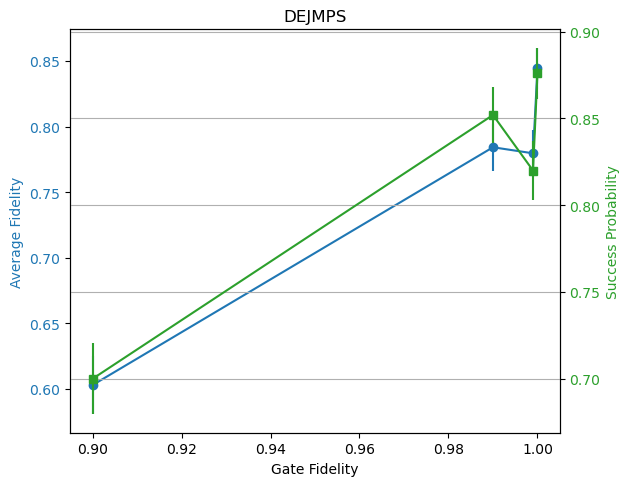

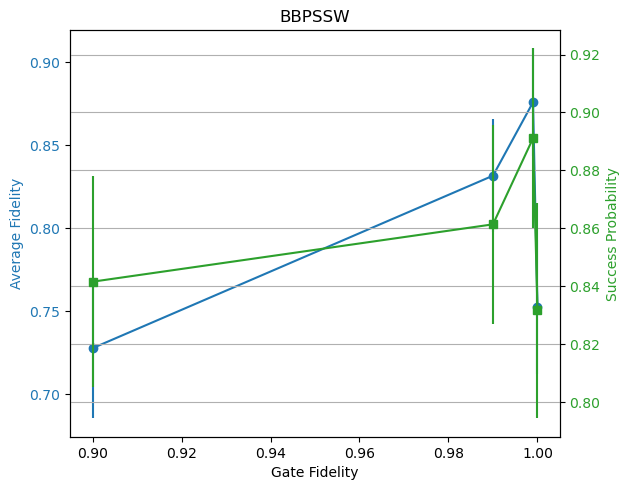

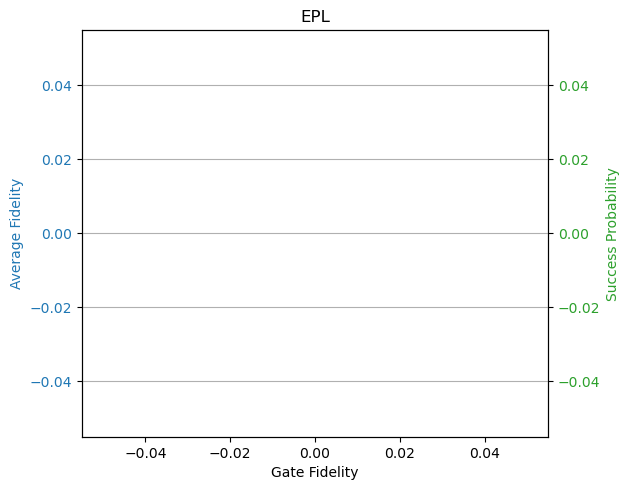

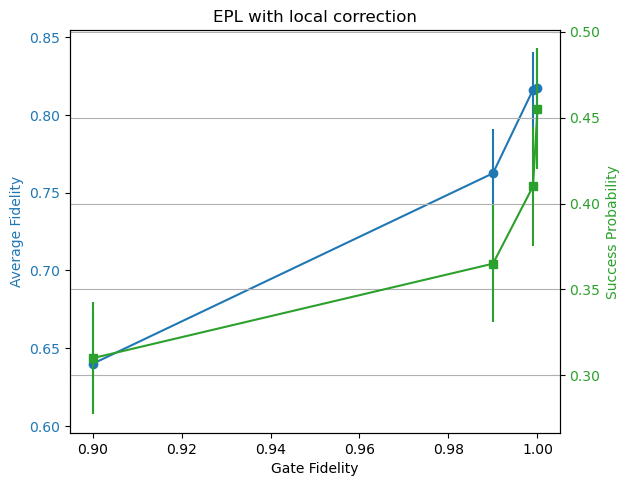

In [8]:
# fix f at 0.8, vary g
fr = (0.85, 0.85)
gr = (0.9, 1)
dejmps = analyze_multiple_combos(dejmps_data, fidelity_range=fr, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)
bbpssw = analyze_multiple_combos(bbpssw_data, fidelity_range=fr, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)
epl = analyze_multiple_combos(epl_data, fidelity_range=fr, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)
epl_local = analyze_multiple_combos(epl_local_change_data, fidelity_range=fr, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)

plot_1d_analysis(dejmps, 'gate_fidelity', title='DEJMPS')
plot_1d_analysis(bbpssw, 'gate_fidelity', title='BBPSSW')
plot_1d_analysis(epl, 'gate_fidelity', title='EPL')
plot_1d_analysis(epl_local, 'gate_fidelity', title='EPL with local correction')

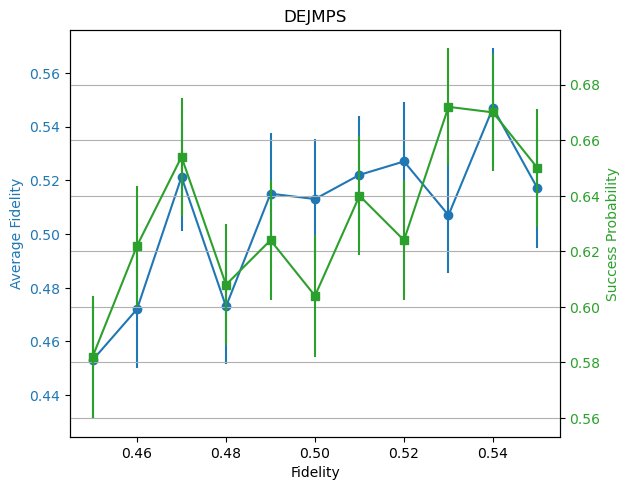

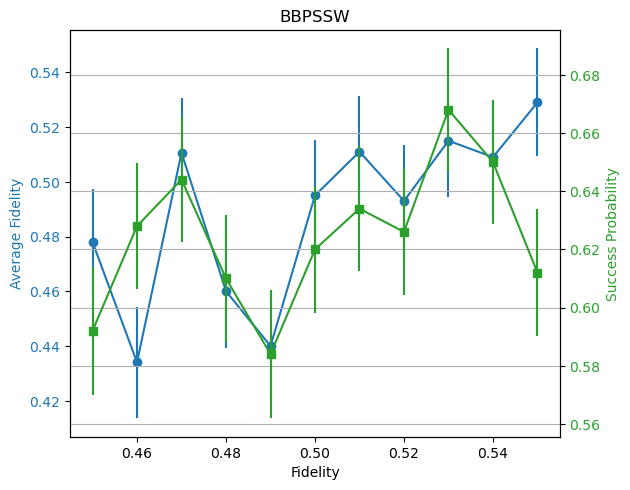

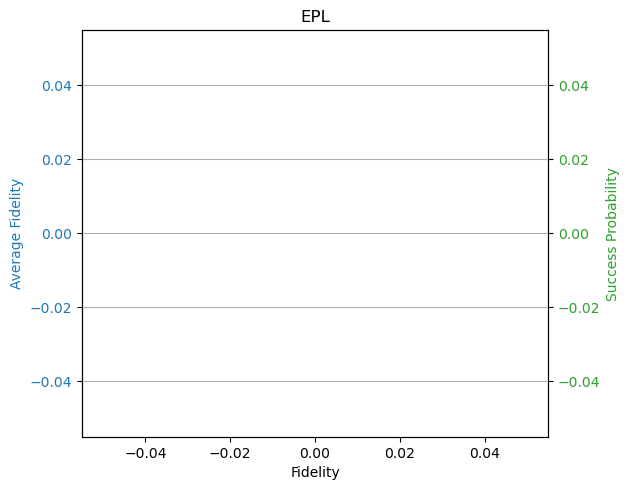

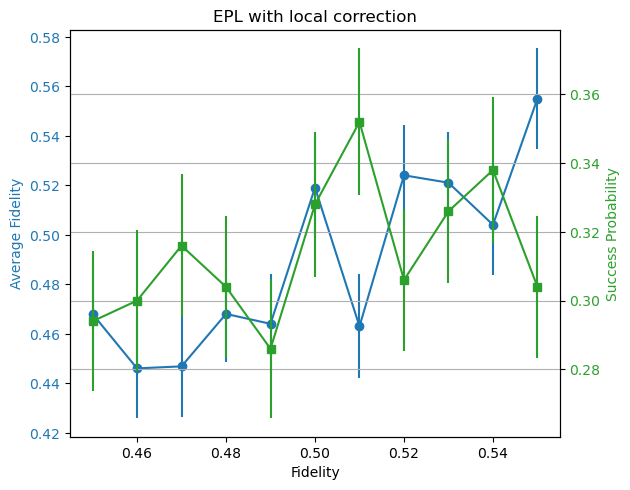

In [6]:
# fix perfect g, vary f near 0.5
# will need to run more simulations -- i think output f=0.5 is worst case? but not sure. want to see which protocol gets off 0.5 first
fr = (0.45, 0.55)
gr = (1, 1)
dejmps_results_g1_f_low = analyze_multiple_combos(dejmps_data, fidelity_range=fr, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)
bbpssw_results_g1_f_low = analyze_multiple_combos(bbpssw_data, fidelity_range=fr, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)
epl_results_g1_f_low = analyze_multiple_combos(epl_data, fidelity_range=fr, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)
epl_local_change_results_g1_f_low = analyze_multiple_combos(epl_local_change_data, fidelity_range=fr, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)

plot_1d_analysis(dejmps_results_g1_f_low, 'fidelity', title='DEJMPS')
plot_1d_analysis(bbpssw_results_g1_f_low, 'fidelity', title='BBPSSW')
plot_1d_analysis(epl_results_g1_f_low, 'fidelity', title='EPL')
plot_1d_analysis(epl_local_change_results_g1_f_low, 'fidelity', title='EPL with local correction')

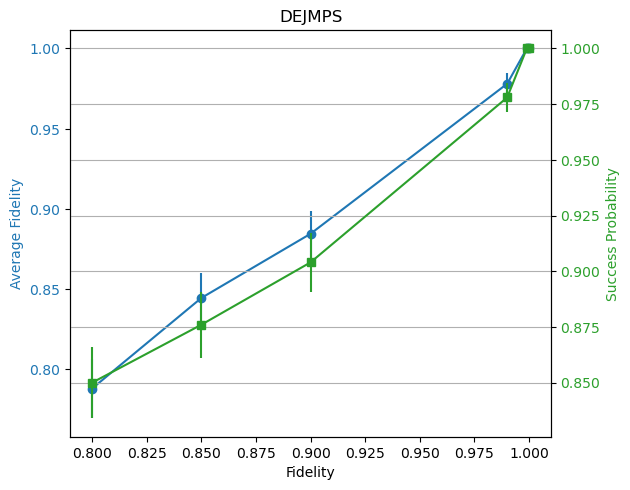

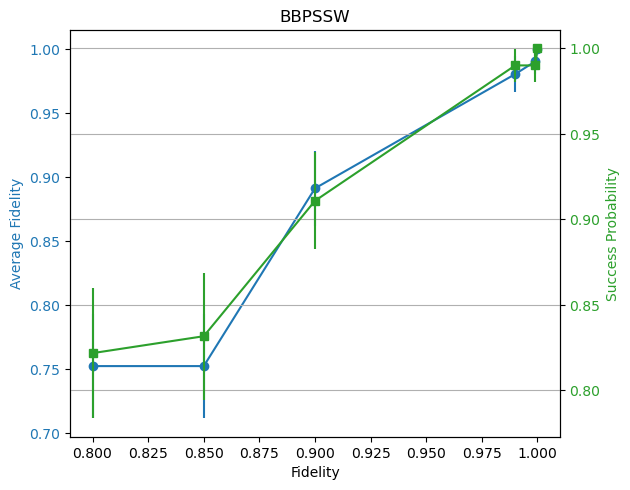

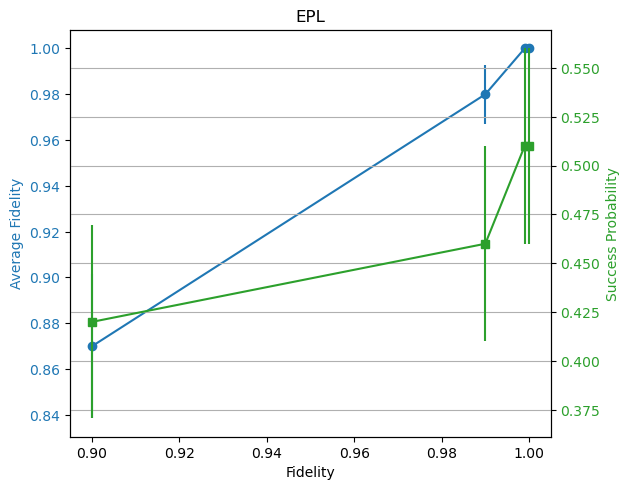

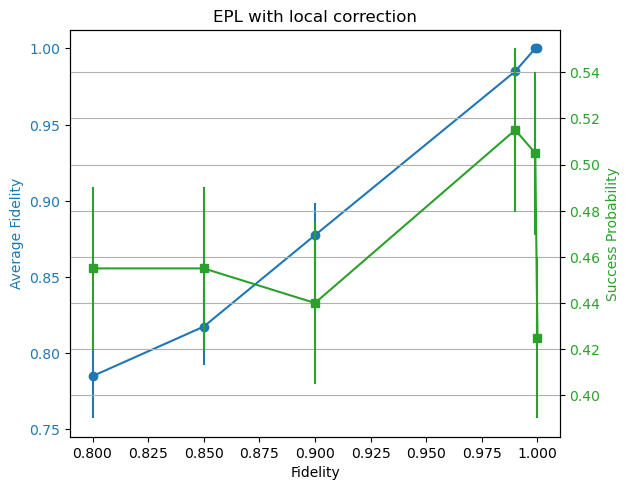

In [7]:
# fix perfect g, vary f near the high end rather than 0.5
# will need to run more simulations -- i think output f=0.5 is worst case? but not sure. want to see which protocol gets off 0.5 first
fr = (0.8, 1)
gr = (1, 1)
dejmps_results_g1_f_high = analyze_multiple_combos(dejmps_data, fidelity_range=fr, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)
bbpssw_results_g1_f_high = analyze_multiple_combos(bbpssw_data, fidelity_range=fr, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)
epl_results_g1_f_high = analyze_multiple_combos(epl_data, fidelity_range=fr, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)
epl_local_change_results_g1_f_high = analyze_multiple_combos(epl_local_change_data, fidelity_range=fr, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)

plot_1d_analysis(dejmps_results_g1_f_high, 'fidelity', title='DEJMPS')
plot_1d_analysis(bbpssw_results_g1_f_high, 'fidelity', title='BBPSSW')
plot_1d_analysis(epl_results_g1_f_high, 'fidelity', title='EPL')
plot_1d_analysis(epl_local_change_results_g1_f_high, 'fidelity', title='EPL with local correction')

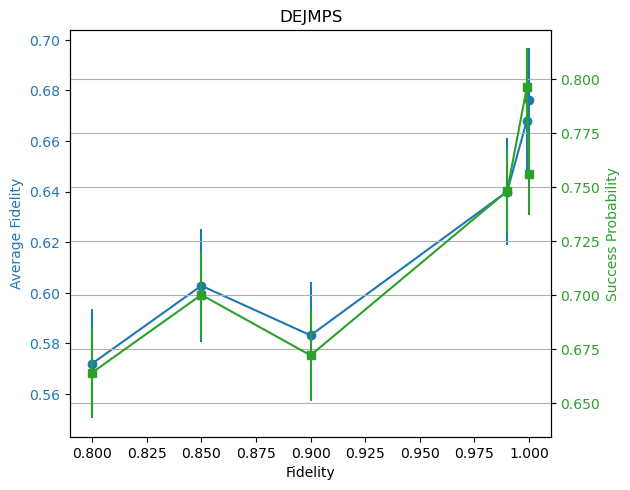

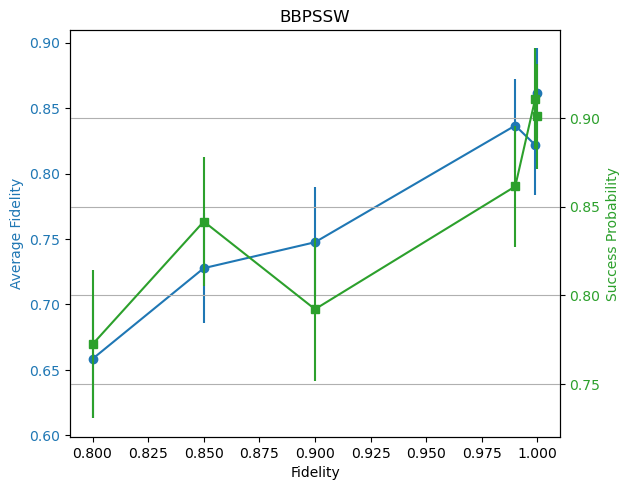

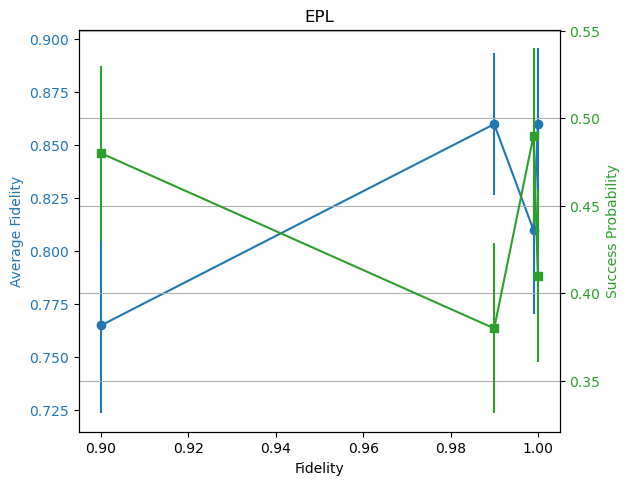

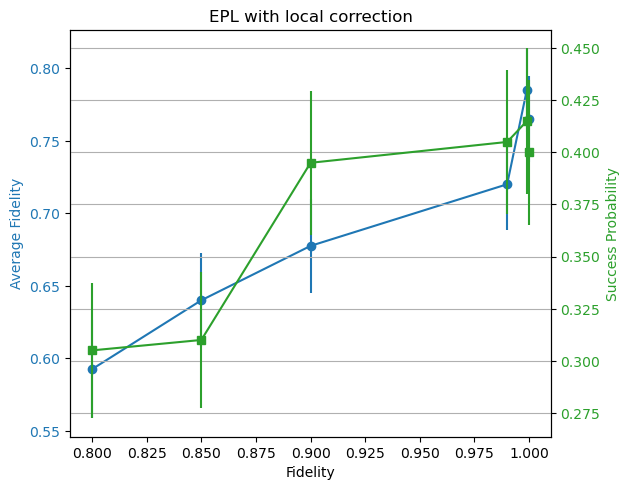

In [8]:
# fix g=0.9, vary f
# pretty bad everywhere even for high f -- gate fidelity is very important
gr = (0.9, 0.9)
dejmps_results_g9 = analyze_multiple_combos(dejmps_data, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)
bbpssw_results_g9 = analyze_multiple_combos(bbpssw_data, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)
epl_results_g9 = analyze_multiple_combos(epl_data, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)
epl_local_change_results_g9 = analyze_multiple_combos(epl_local_change_data, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)

plot_1d_analysis(dejmps_results_g9, 'fidelity', title='DEJMPS')
plot_1d_analysis(bbpssw_results_g9, 'fidelity', title='BBPSSW')
plot_1d_analysis(epl_results_g9, 'fidelity', title='EPL')
plot_1d_analysis(epl_local_change_results_g9, 'fidelity', title='EPL with local correction')

# 2D plots

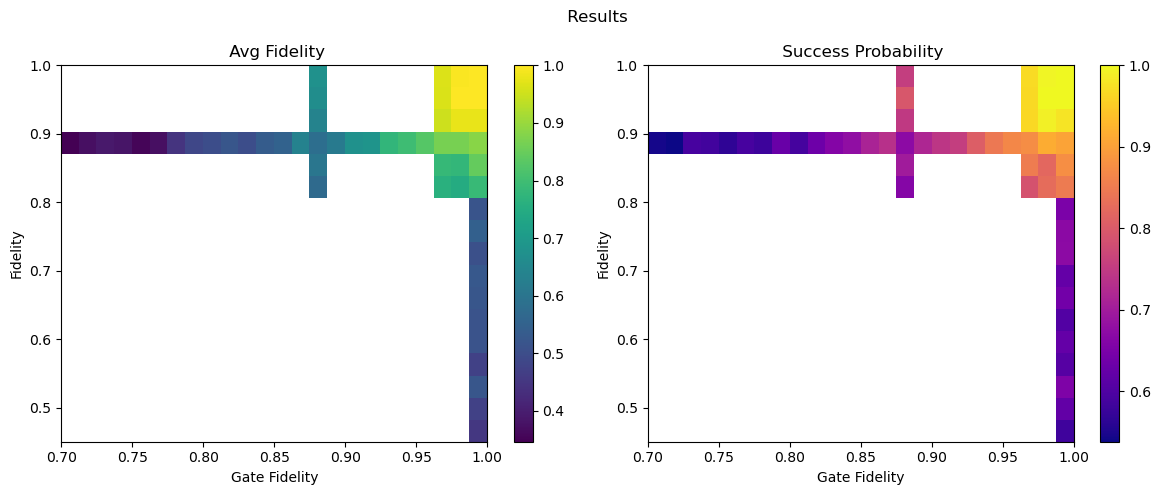

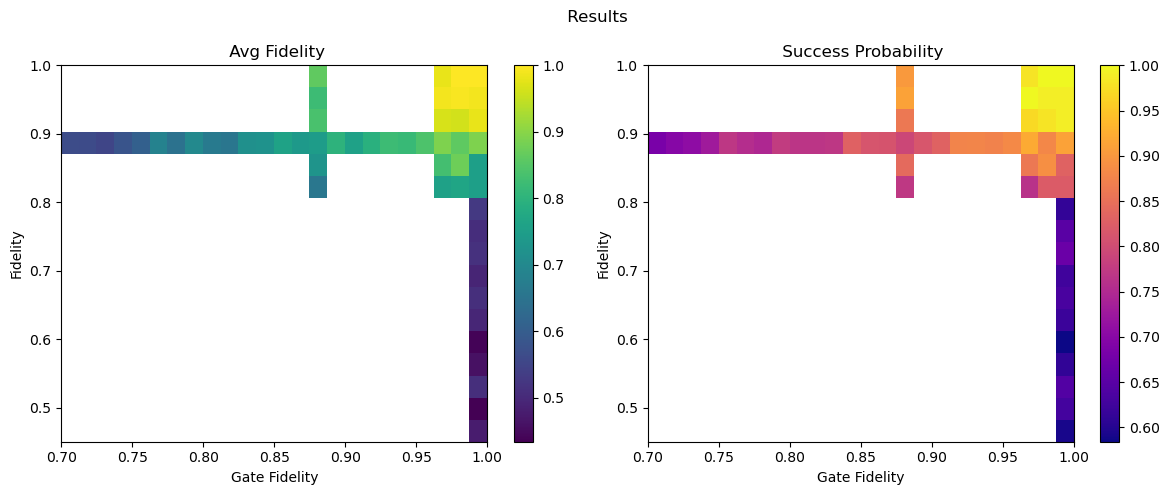

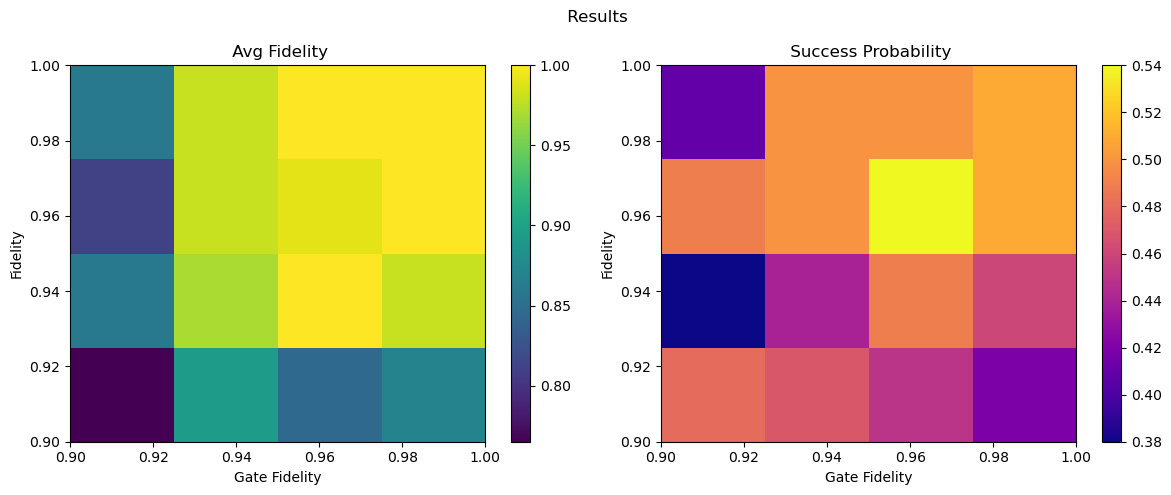

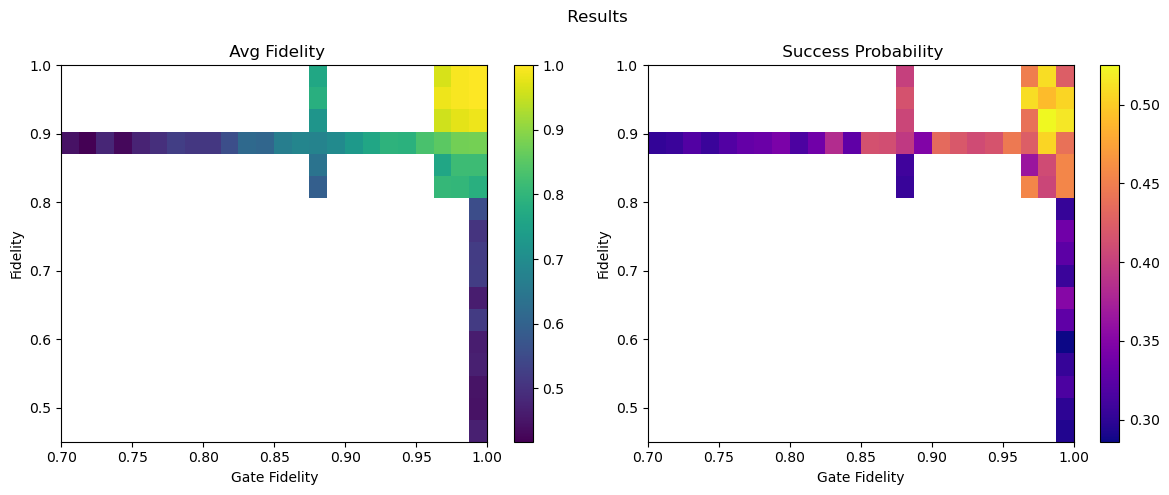

In [9]:
# Analyze all available data
dejmps_results = analyze_multiple_combos(dejmps_data, n_bootstrap=1000, seed=42)
bbpssw_results = analyze_multiple_combos(bbpssw_data, n_bootstrap=1000, seed=42)
epl_results = analyze_multiple_combos(epl_data, n_bootstrap=1000, seed=42)
epl_local_change_results = analyze_multiple_combos(epl_local_change_data, n_bootstrap=1000, seed=42)

plot_2d_heatmaps(dejmps_results)
plot_2d_heatmaps(bbpssw_results)
plot_2d_heatmaps(epl_results)
plot_2d_heatmaps(epl_local_change_results)

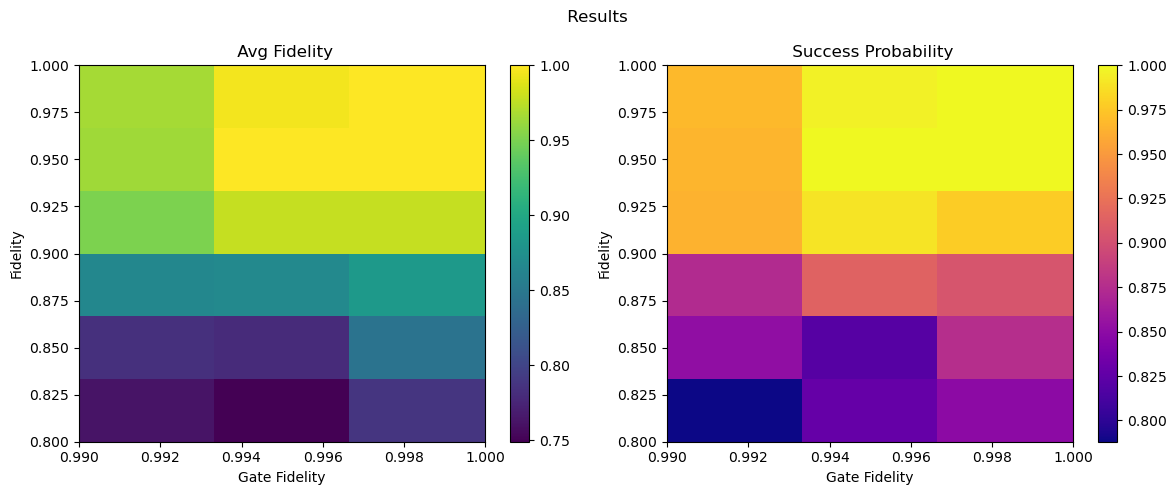

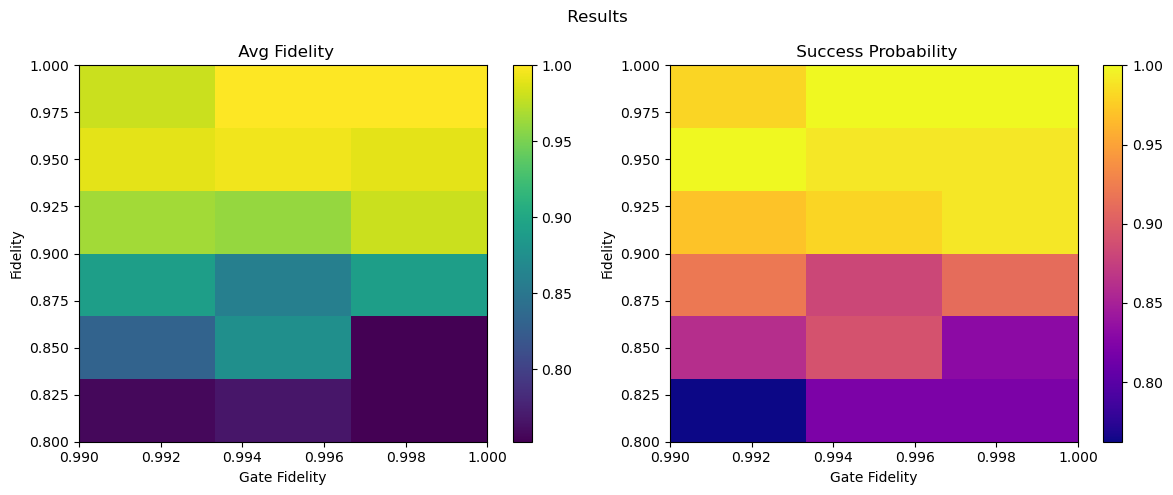

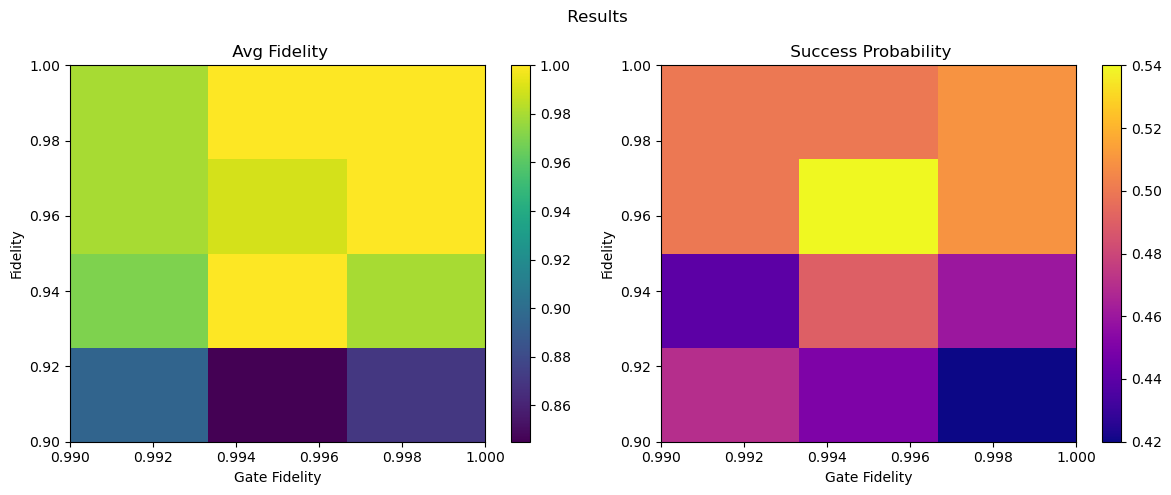

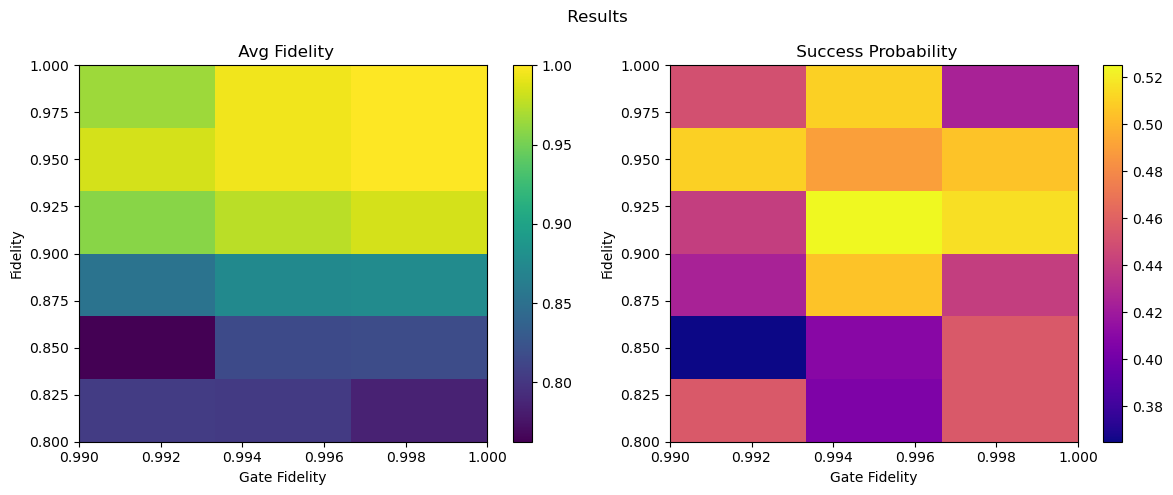

In [10]:
# focusing on top right where we have most data
# need to do more simulations (maybe just lower the number of runs to save time)
# also might be nice to have some sort of 3d bar plot bc colormaps are hard for me to read
fr = (0.8, 1)
gr = (0.99, 1)
dejmps_results = analyze_multiple_combos(dejmps_data, fidelity_range=fr, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)
bbpssw_results = analyze_multiple_combos(bbpssw_data, fidelity_range=fr, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)
epl_results = analyze_multiple_combos(epl_data, fidelity_range=fr, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)
epl_local_change_results = analyze_multiple_combos(epl_local_change_data, fidelity_range=fr, gate_fidelity_range=gr, n_bootstrap=1000, seed=42)

plot_2d_heatmaps(dejmps_results)
plot_2d_heatmaps(bbpssw_results)
plot_2d_heatmaps(epl_results)
plot_2d_heatmaps(epl_local_change_results)